In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import string
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Functions Posts

In [ ]:
#Function to convert the time to utc
def convert_time(UTC_time):
    return datetime.utcfromtimestamp(UTC_time)

#Clean the dataframe by removing duplicates formating utc and dropping na values
  #text is a parameter in case comments are used as the text is contained in "body" for comments "self text" for post.
def clean_df(df,text ="selftext"):

  print("Number of posts before cleaning:",len(df.index))

  #Selects columns required and drops the rest
  df = df[["id","created_utc","subreddit_name_prefixed","title",text]]
  

  #Format time
  df['created_utc'] = df['created_utc'].apply(convert_time)
  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')

  graph_amount(df," ")
  #Merge title and posts into one column.
  df["content"] = df["title"]+" "+ df[text]
  
  #drop duplicates
  df.drop_duplicates()

  df['content_copy'].replace('\n', " ", inplace=True)

  #drop posts with no text values na
  print("Number of entries after removed na:",len(df.index))
  df = df.dropna(subset = ["content"])

  print("remove deleted")
  #remove posts that have been deleted/removed
  df.drop(df[df['content'] == '[removed]'].index, inplace = True)
  df.drop(df[df['content'] == '[deleted by user][removed]'].index, inplace = True)
  df.drop(df[df['content'] == '[deleted]'].index, inplace = True)
  print("remove tags")
  #Remove certain tags.
  df['content'] = df['content'].replace('\[removed\]','',regex = True)
  df['content'] = df['content'].replace('\[deleted\]','',regex = True)
  df['content'] = df['content'].replace('\[deleted by user\]','',regex = True)

  #Due to empty rows having whitespaces to remove these the following is done 
  print("remove empty posts")
  #Copy all content to new column 
  df['content_copy'] = df['content']
  #Remove all white space in new column 
  df["content_copy"] = df['content_copy'].str.replace(' ', '')
  #Replace empty content with nan and drop those rows.
  df['content_copy'].replace('', np.nan, inplace=True)
  df = df.dropna(subset = ['content_copy'])

  print("Number of entries after removed posts:",len(df.index))


  df = df[["id","created_utc","subreddit_name_prefixed","content"]]
  return df

def details(df):
  df['post_charachter_count'] = df['content'].str.len()
  df_mean = df.groupby('id')['post_charachter_count'].mean().mean()
  print(df_mean)

#Graph frequency of posts over time.
def graph_amount(df,subreddit ,text = "selftext"):
  data = df.groupby([pd.Grouper(key='created_utc', freq='m')])[text].count().reset_index(name="count")
  fig, ax = plt.subplots(figsize = (15, 7))
  
  sns.lineplot(ax = ax,data=data, x="created_utc", y="count")
  plt.xticks(rotation=45, ha="right")
  plt.title("Frequency of posts over time in r/"+ subreddit)
  plt.show()


  years = mdates.YearLocator()   # every year
  months = mdates.MonthLocator()  # every month
  years_fmt = mdates.DateFormatter('%Y%b') 
  months_fmt = mdates.DateFormatter('%b') 
  sns.set_palette("Set1")

  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(years_fmt)
  ax.xaxis.set_minor_locator(months)
  ax.xaxis.set_minor_formatter(months_fmt)

  plt.legend(title = "Subreddit")
  plt.ylabel("% of posts")
  plt.xlabel("Date")

  plt.xticks(rotation = 'vertical')
  for text in ax.get_xminorticklabels():
    text.set_rotation(90)
  plt.title("Percentage of posts containing " +column + " over time")
  plt.show()


#Divide posts into sentences.
def sentences(df,subreddit,filepath):
  sentences_df = pd.concat([pd.DataFrame({"id": row['id'], 'content': content, "created_utc": row['created_utc'],"subreddit_name_prefixed":row["subreddit_name_prefixed"]}, index=[0]) 
           for _, row in df.iterrows() 
           for content in row['content'].split('.') if content != ''])
  sentences_df.to_csv(filepath+"/FinalData/"+subreddit+"sentences"+"_cleaned"+".csv")

#Clean dataframe, graph it and save new clean dataframe
def run(filepath, subreddit,text = "selftext"):
 
  df = pd.read_csv(filepath+subreddit+".csv", error_bad_lines=False)
  df = clean_df(df, text)
  df.to_csv(filepath+"/FinalData/"+subreddit+"_cleaned"+".csv")
  print(df.info())
  details(df)
  graph_amount(df,subreddit)  
  return df


def graph_average_length(df,subreddit):
  data = df.groupby([pd.Grouper(key='created_utc', freq='m')])["post_charachter_count"].mean().reset_index(name="count")
  fig, ax = plt.subplots(figsize = (15, 7))
  sns.lineplot(ax = ax,data=data, x="created_utc", y="count")
  plt.xticks(rotation=45, ha="right")
  plt.title("Length of posts over time in r/"+ subreddit)
  plt.show()

def pandemic_mentions(df, subreddit):
  data = df.groupby([pd.Grouper(key='created_utc', freq='m')])["post_charachter_count"].mean().reset_index(name="count")
  

## Posts

ADHD

In [ ]:
filepath = "/content/drive/MyDrive/adhdreddit/"
subreddit = "adhd_posts"
df_adhd = run(filepath,subreddit)

<ipython-input-6-4d172fabf11d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_adhd = run(filepath,subreddit)


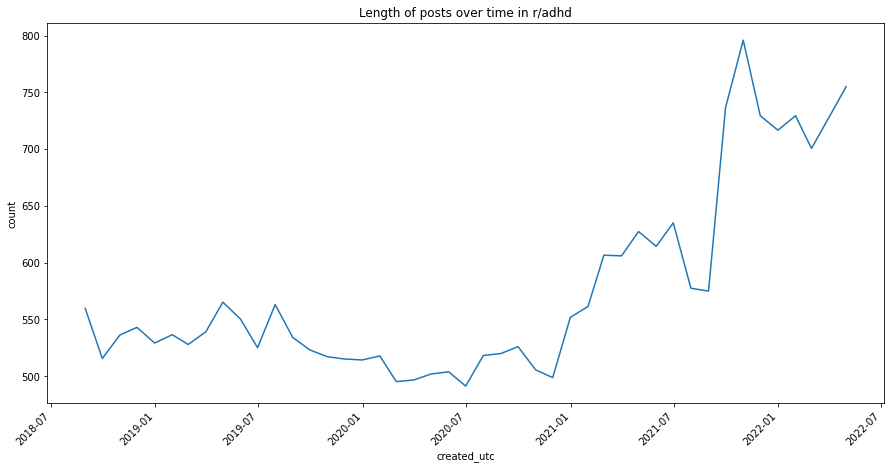

In [ ]:
graph_average_length(df_adhd,"adhd")

ADHDWomen

In [ ]:
filepath = "/content/drive/MyDrive/adhdreddit/"
subreddit ="adhdwomen_posts"
df_adhdwomen = run(filepath,subreddit)


NameError: ignored

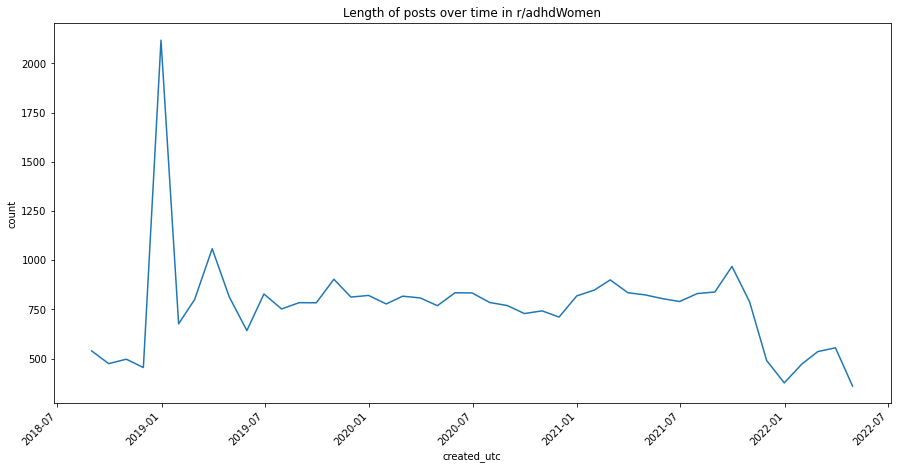

In [ ]:
graph_average_length(df_adhdwomen, "adhdWomen")

Askreddit

In [ ]:
filepath = "/content/drive/MyDrive/adhdreddit/"
subreddit = "askreddit_posts"
df_askreddit = run(filepath,subreddit)

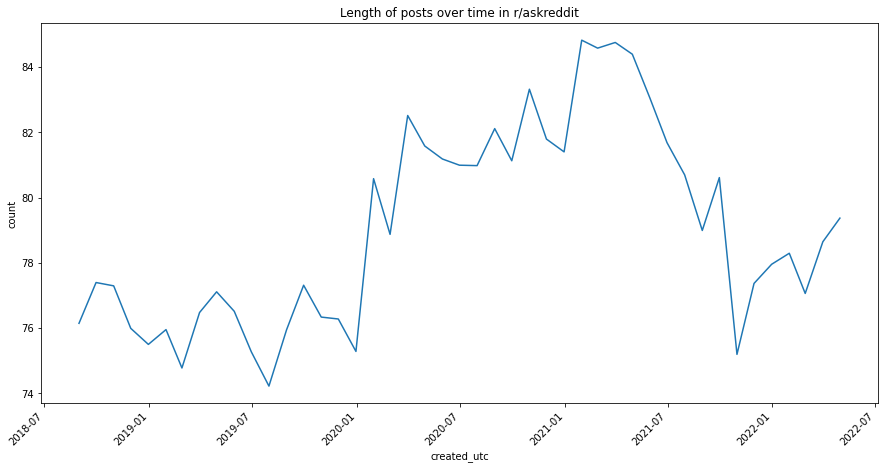

In [ ]:
graph_average_length(df_askreddit, "askreddit")

Removing adhd as a word to avoid it as a topic as well as changing all different type of medications to "medication"(keyword list)

##stuff 

In [ ]:
#Clean text for each post
def clean_text(df):
  pre_processed= []
  #Remove stopwords
  stop_words = set(stopwords.words('english')) 
  #For every post remove punctuation and toenise words and lowercase
  for x in df.selftext: 
    x = str(x) 

    #remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    x = x.translate(translator)
    # split words 
    values = x.split() 
    # Converts each token into lowercase and removes stopwords
    values =[w.lower() for w in values if w not in stop_words]
    pre_processed.append(values)
    
  return pre_processed


pre_processed_text = clean_text(df_clean)